Step 1: Set Up the Environment and Load Data

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
file_path = 'C:/Users/wasim/OneDrive/Desktop/MySQL/Data Analysis/October-Datasets/Categories.csv'
sales_data = pd.read_csv(file_path)

In [8]:
# Show Data Head
sales_data.head(10)

,Category,Items sold,Net Revenue,Products,Orders
0,Heat Transfer Vinyl,230,2146.00,27,25
1,HTV Yard,187,1637.26,22,20
2,"Easyweed HTV 12"" Yard",89,557.81,8,7
3,"EasyWeed® Glitter HTV 20"" Yard",81,960.51,9,10
4,"Easyweed Glitter White &amp; Neon 20"" Yard",38,473.99,2,6
5,Permanent Vinyl,25,145.25,5,4
6,Sign/Sticker Vinyl by Lumina,22,95.75,4,4
7,Ink,10,1034.00,6,6
8,"EasyWeed Sparkle HTV 12"" Yard",8,56.00,1,1
9,DTF &amp; Transfer Films/Adhesives,7,1135.00,2,2


Step 2: Explore the Data

In [9]:
# Display basic information about the Datasets
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category     49 non-null     object 
 1   Items sold   49 non-null     int64  
 2   Net Revenue  49 non-null     float64
 3   Products     49 non-null     int64  
 4   Orders       49 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.0+ KB
None


In [10]:
# Check for missing values
print(sales_data.isnull().sum())

Category       0
Items sold     0
Net Revenue    0
Products       0
Orders         0
dtype: int64


In [11]:
# Display unique categories in the 'Category' column

categories = sales_data['Category'].unique() 
print(f"Unique Categories: {categories}")

Unique Categories: ['Heat Transfer Vinyl' 'HTV Yard' 'Easyweed HTV 12" Yard'
 'EasyWeed® Glitter HTV 20" Yard'
 'Easyweed Glitter White &amp; Neon 20" Yard' 'Permanent Vinyl'
 'Sign/Sticker Vinyl by Lumina' 'Ink' 'EasyWeed Sparkle HTV 12" Yard'
 'DTF &amp; Transfer Films/Adhesives' 'Screen Printing Chemicals'
 'Adhesive Powder for DTF &amp; Plastisol Transfers'
 'DTF/Plastisol Adhesive Powder'
 'Triangle Plastisol Inks High Opacity/Bleed Resistant Ink'
 'Easyweed 12" Fluorescent Yard' 'TexTac Liquid Pallet Adhesive'
 'Easy® Puff Metallic 12″ Yard' 'Positive Film/Positive Ink'
 'Screen Printable Paper' 'Stretch HTV 15"'
 'Easyweed Stretch HTV 15" Yard' 'Glitter Sign/Sticker Vinyl by Siser'
 'WM White Inks' 'Waterproof Ink Jet Film'
 'Ultra Strip 5000 12.5"x19" Paper' 'Emulsion' 'Screen Printing'
 'HTV Sheets' 'Custom Mix Ink (PMS)' 'Free Shipping' 'IR11 Ink Remover'
 'Screen Printing Equipment' 'Screen Printing Parts/Accessories'
 'StarCraft Solo 16" Cutting Machine' 'Plotter Cutters'
 

Step 3: Data Cleaning

In [12]:
# Fill missing values (if any) with 0, alternatively drop them
sales_data.fillna(0, inplace=True)

# Confirm if missing values are handled
print(sales_data.isnull().sum())

Category       0
Items sold     0
Net Revenue    0
Products       0
Orders         0
dtype: int64


Step 4: Perform Sales Analysis

In [14]:
# Sales by Category

# Calculate total sales per category
category_sales = sales_data.groupby('Category')['Net Revenue'].sum().reset_index()

# Display the total sales per category
print(category_sales)


                                             Category  Net Revenue
0                           Accessories/Miscellaneous         3.00
1   Adhesive Powder for DTF &amp; Plastisol Transfers      1135.00
2                                            Aerosols        94.68
3                            Camie 380 Flash Adhesive        94.68
4                                Custom Mix Ink (PMS)       120.00
5                  DTF &amp; Transfer Films/Adhesives      1135.00
6                       DTF/Plastisol Adhesive Powder      1135.00
7                                       Direct Prep 2        30.65
8                       EasyWeed Sparkle HTV 12" Yard        56.00
9                      EasyWeed® Glitter HTV 20" Yard       960.51
10                      Easyweed 12" Fluorescent Yard        30.44
11                             Easyweed 12"x12" Sheet         4.75
12         Easyweed Glitter White &amp; Neon 20" Yard       473.99
13                              Easyweed HTV 12" Yard       55

In [22]:
# Load Orders dataset
orders_file_path = 'C:/Users/wasim/OneDrive/Desktop/MySQL/Data Analysis/October-Datasets/Orders.csv'
orders_data = pd.read_csv(orders_file_path)


In [23]:
# Convert 'Date' column to datetime format
orders_data['Date'] = pd.to_datetime(orders_data['Date'], errors='coerce')



In [24]:
# Drop rows where 'Date' couldn't be parsed
orders_data.dropna(subset=['Date'], inplace=True)



In [27]:
# Resample the data by month and sum the 'Net sales'
monthly_sales = orders_data.resample('MS', on='Date').sum()



In [28]:
# Display the monthly sales data
print(monthly_sales[['Net sales', 'Items sold']])

                                                    Net sales  Items sold
Date                                                                     
2024-10-01  27270.2214.7511.5511873521.854237526180.154294...         289


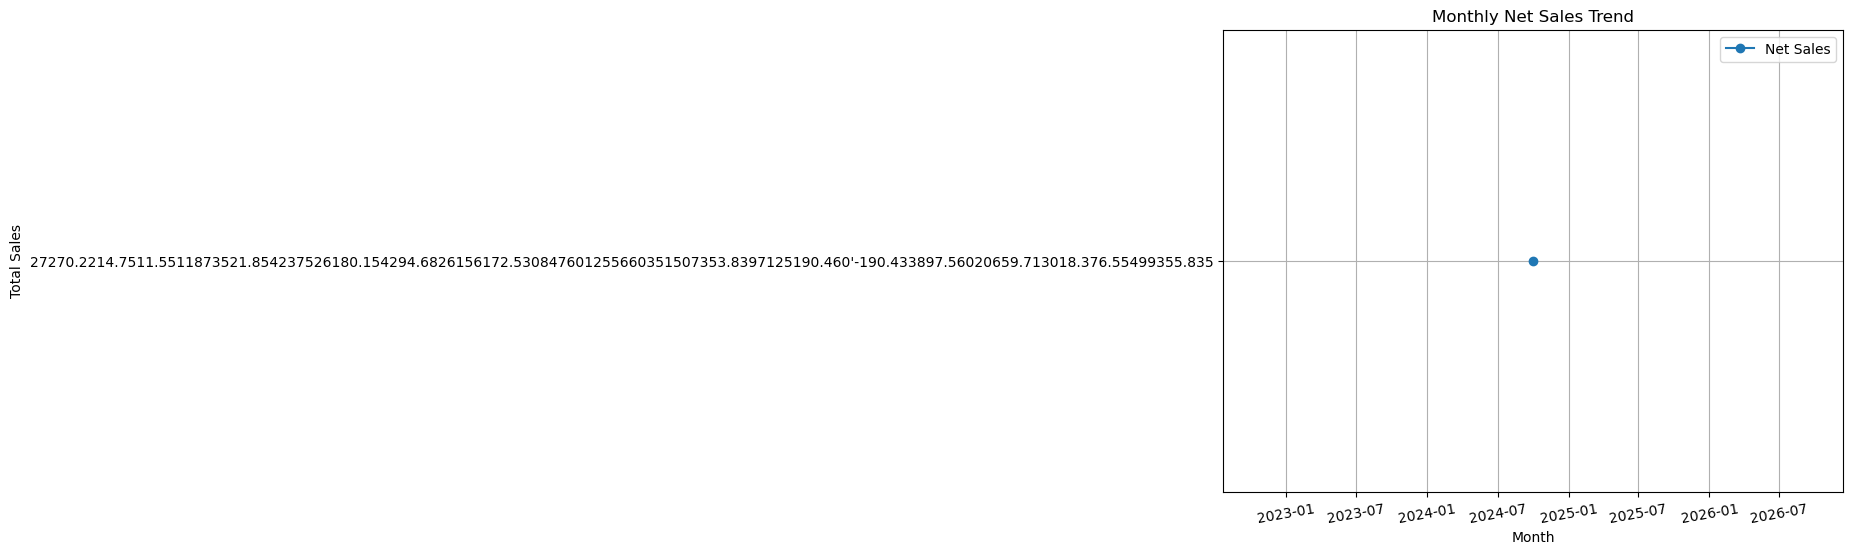

In [42]:
# Plot monthly sales trend
plt.figure(figsize=(8, 6))
plt.plot(monthly_sales.index, monthly_sales['Net sales'], marker='o', linestyle='-', label='Net Sales')
plt.title('Monthly Net Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=10)
plt.grid(True)
plt.legend()
plt.show()

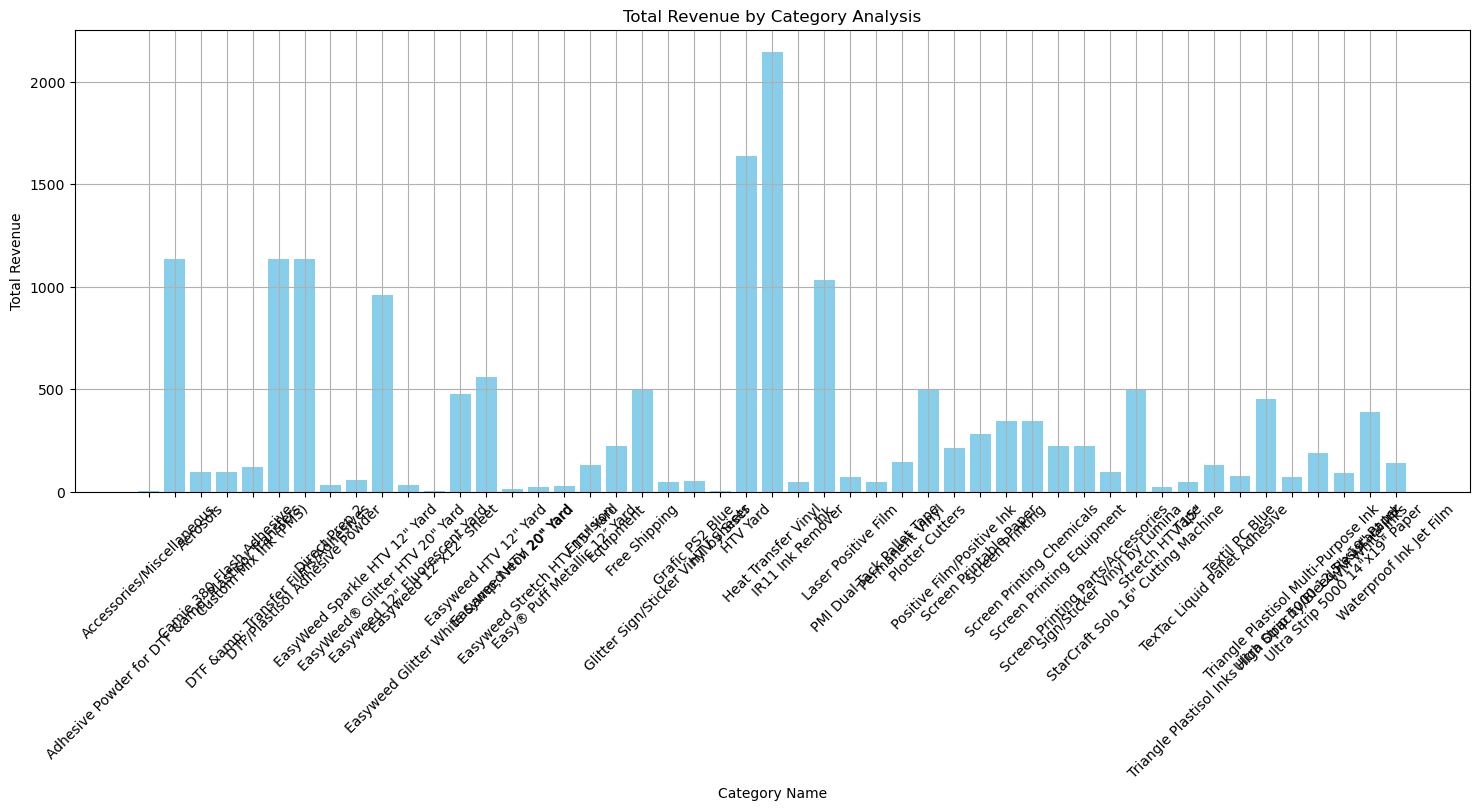

In [57]:
# Load Category dataset
category_file_path = 'C:/Users/wasim/OneDrive/Desktop/MySQL/Data Analysis/October-Datasets/Categories.csv'
category_data = pd.read_csv(category_file_path)


# Analyze total items sold and net revenue per category
category_summary = category_data.groupby('Category').agg(
    total_items_sold=('Items sold', 'sum'),
    total_revenue=('Net Revenue', 'sum')
).reset_index()

# # Display the summary
# print(category_summary)

# Plot category-level total revenue
plt.figure(figsize=(18, 6))
plt.bar(category_summary['Category'], category_summary['total_revenue'], color='skyblue')
plt.title('Total Revenue by Category Analysis')
plt.xlabel('Category Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
